<h2 style="font-weight: bold;">ANALYSIS OF A LOANS DATASET</h2>
<p>This is an analysis of the loan_train.csv file to derive insight from the data</p>
<p>Our group used questions to help us analyze the data and understand the story of the dataset. They questions are as follows:</p>
<ol>
    <li>What is the relationship between marital status and loan approvals?</li>
    <li>What are the most common loan terms(in months) and their effect on approval rates?</li>
    <li>Is there a relation between the applicants' income and the loan amount?</li>
    <li>Do applicants from urban areas have higher loan approval rates compared to those from rural or semi-urban areas?</li>
    <li>What is the effect of the number of dependents on loan approval?</li>
    <li>What is the distribution of applicants' income across different property areas?</li>
    <li>How does the applicant's education level affect loan approvals?</li>
    <li>How does the applicant's self-employment status affect loan approval chances?</li>
    <li>Are there differences in loan approval rates based on gender?</li>
    <li>How does the presence of a co-applicant affect the likelihood of loan approval?</li>
    <li>Is there a relationship between the combined income of the applicant and co-applicant and the loan amount?</li>
    <li>What effect does credit history have on and loan status?</li>
</ol>


In [119]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import re

In [120]:
#To call on the dataset
data = pd.read_csv("loan_train.csv")

In [121]:
#displays the first few rows
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [122]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [123]:
#To show the columns in the dataset
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [124]:
#to get a statistical summary of the dataset
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [125]:
#to get a summary of the data-frame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [126]:
#To check for missing values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [127]:
#changes the column name
data = data.rename(columns={'Loan_Amount_Term': "Loan_Term(months)", 'LoanAmount':"LoanAmount(Thousands)"})
data.sample(1)                   

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount(Thousands),Loan_Term(months),Credit_History,Property_Area,Loan_Status
311,LP002004,Male,No,0,Not Graduate,No,2927,2405.0,111.0,360.0,1.0,Semiurban,Y


In [128]:
data_cleaned = data.drop_duplicates()

In [129]:
#to show the number of rows and columns
data_cleaned.shape

(614, 13)

In [130]:
#finding the percentage of missing values
data_cleaned.isnull().sum()/data_cleaned.shape[0]*100
#since the columns have low percentages of missing values we are able to remove them without affecting the results of analysis

Loan_ID                  0.000000
Gender                   2.117264
Married                  0.488599
Dependents               2.442997
Education                0.000000
Self_Employed            5.211726
ApplicantIncome          0.000000
CoapplicantIncome        0.000000
LoanAmount(Thousands)    3.583062
Loan_Term(months)        2.280130
Credit_History           8.143322
Property_Area            0.000000
Loan_Status              0.000000
dtype: float64

In [131]:
#removing the missing values
data_cleaned.dropna(axis=0, inplace=True)

In [132]:
data_cleaned.isnull().sum()
#the missing values have been removed

Loan_ID                  0
Gender                   0
Married                  0
Dependents               0
Education                0
Self_Employed            0
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount(Thousands)    0
Loan_Term(months)        0
Credit_History           0
Property_Area            0
Loan_Status              0
dtype: int64

In [133]:
data_cleaned.shape

(480, 13)

<h1 style="font-weight: bold;">DATA CLEANING</h1>
<p>We will go through each column to verify that there are no non-numerical values that can affect data analysis process</p>

In [134]:
#creating a copy of the data
loans = data_cleaned.copy()
#our data copy has been created
loans.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount(Thousands),Loan_Term(months),Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [135]:
loans.isnull().sum()

Loan_ID                  0
Gender                   0
Married                  0
Dependents               0
Education                0
Self_Employed            0
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount(Thousands)    0
Loan_Term(months)        0
Credit_History           0
Property_Area            0
Loan_Status              0
dtype: int64

In [136]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Loan_ID                480 non-null    object 
 1   Gender                 480 non-null    object 
 2   Married                480 non-null    object 
 3   Dependents             480 non-null    object 
 4   Education              480 non-null    object 
 5   Self_Employed          480 non-null    object 
 6   ApplicantIncome        480 non-null    int64  
 7   CoapplicantIncome      480 non-null    float64
 8   LoanAmount(Thousands)  480 non-null    float64
 9   Loan_Term(months)      480 non-null    float64
 10  Credit_History         480 non-null    float64
 11  Property_Area          480 non-null    object 
 12  Loan_Status            480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


In [137]:
#has dropped the Loan_ID column
loans = loans.drop(columns = "Loan_ID")

In [138]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 480 non-null    object 
 1   Married                480 non-null    object 
 2   Dependents             480 non-null    object 
 3   Education              480 non-null    object 
 4   Self_Employed          480 non-null    object 
 5   ApplicantIncome        480 non-null    int64  
 6   CoapplicantIncome      480 non-null    float64
 7   LoanAmount(Thousands)  480 non-null    float64
 8   Loan_Term(months)      480 non-null    float64
 9   Credit_History         480 non-null    float64
 10  Property_Area          480 non-null    object 
 11  Loan_Status            480 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 48.8+ KB


In [139]:
loans

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount(Thousands),Loan_Term(months),Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [140]:
loans.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount(Thousands),Loan_Term(months),Credit_History,Property_Area,Loan_Status
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


<h1>Checking values</h1>
<p>In this section, we checked whether the values of the columns for unique values and the data types in the data set</p>

<ol style= "font-weight: bold;">
    <h3>1. Gender</h3>
</ol>
<p>Missing values were omitted</p>


In [141]:
loans['Gender'].unique()

array(['Male', 'Female'], dtype=object)

<ol style= "font-weight: bold;">
    <h3>2. Married</h3>
</ol>
<p>Missing values were omitted</p>


In [142]:
loans['Married'].unique()

array(['Yes', 'No'], dtype=object)

<ol style= "font-weight: bold;">
    <h3>3. Dependents</h3>
</ol>


In [143]:
# Function to strip non-numeric characters which in this case is the plus sign after 3
def strip_non_numbers(value):
     # Use regular expression to replace non-numeric characters with an empty string
     #calls on the imported library
     return re.sub(r'\D', '', str(value))

 # Apply the function to the specific column
loans['Dependents'] = loans['Dependents'].apply(strip_non_numbers)

In [144]:
loans.tail()
#results below show that the '+' has been removed

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount(Thousands),Loan_Term(months),Credit_History,Property_Area,Loan_Status
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


<ol style= "font-weight: bold;">
    <h3>4. Education</h3>
</ol>


In [145]:
loans['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

<ol style= "font-weight: bold;">
    <h3>5. Self_Employed</h3>
</ol>


In [146]:
loans['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

<ol style= "font-weight: bold;">
    <h3>6. Applicant Income</h3>
</ol>

In [147]:
loans['ApplicantIncome'].unique()

array([ 4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006, 12841,
        3200,  3073,  1853,  1299,  4950,  3510,  4887,  7660,  5955,
        2600,  9560,  2799,  4226,  1442,  3167,  4692,  3500, 12500,
        3667,  4166,  3748,  3600,  1800,  3941,  5649,  5821,  2645,
        4000,  1928,  3086,  4230,  4616, 11500,  2708,  2132,  3366,
        8080,  3357,  2500,  3029,  2609,  5726, 10750,  7100,  4300,
        3208,  1875,  5266,  3750,  1000,  3846,  1378,  3988,  2366,
        8566,  5695,  2958,  6250,  3273,  4133,  3620,  2484,  1977,
        4188,  1759,  4288,  4843,  3052, 11417,  3800,  2071,  5316,
       14583,  5568, 10408,  2137,  2957, 10513,  2014,  2718,  3459,
        4895,  3316, 14999,  4200,  5042,  6950,  2698, 11757,  2330,
       14866,  1538, 10000,  4860,  6277,  2577,  9166,  2281,  3254,
       39999,  9538,  1863,  7933,  3089,  4167,  9323,  2439,  2237,
        8000,  3522,  5708,  4344,  3497,  2045,  5516,  6400,  4600,
       33846,  3625,

<ol style= "font-weight: bold;">
    <h3>7. Coapplicant Income</h3>
</ol>

In [148]:
loans['CoapplicantIncome'].unique()

array([1.50800000e+03, 0.00000000e+00, 2.35800000e+03, 4.19600000e+03,
       1.51600000e+03, 2.50400000e+03, 1.52600000e+03, 1.09680000e+04,
       7.00000000e+02, 8.10600000e+03, 2.84000000e+03, 1.08600000e+03,
       5.62500000e+03, 1.91100000e+03, 2.25300000e+03, 1.04000000e+03,
       1.66700000e+03, 3.00000000e+03, 1.45900000e+03, 7.21000000e+03,
       1.66800000e+03, 1.21300000e+03, 2.33600000e+03, 3.44000000e+03,
       2.27500000e+03, 1.64400000e+03, 1.16700000e+03, 1.59100000e+03,
       2.20000000e+03, 2.25000000e+03, 2.85900000e+03, 3.79600000e+03,
       3.44900000e+03, 4.59500000e+03, 2.25400000e+03, 3.06600000e+03,
       1.87500000e+03, 1.77400000e+03, 4.75000000e+03, 3.02200000e+03,
       4.00000000e+03, 1.88100000e+03, 2.53100000e+03, 2.11800000e+03,
       4.16700000e+03, 2.90000000e+03, 5.65400000e+03, 1.82000000e+03,
       2.30200000e+03, 9.97000000e+02, 3.54100000e+03, 3.26300000e+03,
       3.80600000e+03, 1.03000000e+03, 1.12600000e+03, 3.60000000e+03,
      

In [149]:
#change the data type to integers
loans['CoapplicantIncome'] = loans['CoapplicantIncome'].astype(int)


In [150]:
#to verify if the change has been made
loans['CoapplicantIncome'].unique()

array([ 1508,     0,  2358,  4196,  1516,  2504,  1526, 10968,   700,
        8106,  2840,  1086,  5625,  1911,  2253,  1040,  1667,  3000,
        1459,  7210,  1668,  1213,  2336,  3440,  2275,  1644,  1167,
        1591,  2200,  2250,  2859,  3796,  3449,  4595,  2254,  3066,
        1875,  1774,  4750,  3022,  4000,  1881,  2531,  2118,  4167,
        2900,  5654,  1820,  2302,   997,  3541,  3263,  3806,  1030,
        1126,  3600,   754,  2283,  2142,  8980,  2014,  3850,  1929,
        7750,  3500,  1430,  2083,  2034,  4486,  1425,  1666,   830,
        3750,  1041,  1280,  1447,  3333,   736,  1964,  1619, 11300,
        1451,  7250,  2583,  2500,  1083,  1250,  3021,   983,  1800,
        1775,  1717,  2791,  1695,  2054,  1779,  1260,  5000,  1983,
        5701,  1300,  4417,  4333,  1843,  1868,  3890,  2167,  7101,
        2100,  2209,  3447,  1387,  1811,  1560,  1857,  2223,  1842,
        3274,  2426,   800,   985,  3053,  2000,  2416,  3334,  2541,
        2925,  2934,

In [151]:
# Adding a new column 'TotalIncome' which is the sum of 'ApplicantIncome' and 'CoapplicantIncome'
loans['TotalIncome'] = loans['ApplicantIncome'] + loans['CoapplicantIncome']

#adding the column after coaaplicantincome column
coapp = loans.columns.get_loc('CoapplicantIncome')+1

new_col = loans.columns.to_list()
new_col.insert(coapp, new_col.pop(new_col.index('TotalIncome')))
loans = loans[new_col]

# To check the dataset to ensure the new column has been added using the function above
loans.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,TotalIncome,LoanAmount(Thousands),Loan_Term(months),Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508,6091,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0,3000,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358,4941,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0,6000,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196,9613,267.0,360.0,1.0,Urban,Y


<ol style= "font-weight: bold;">
    <h3>8. Loan Amount(Thousands)</h3>
</ol>

In [152]:
loans['LoanAmount(Thousands)'].unique()

array([128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70., 200.,
       114.,  17., 125.,  76., 133., 104., 315., 116., 191., 122., 110.,
        35.,  74., 106., 320., 144., 184.,  80.,  47., 134.,  44., 100.,
       112., 286.,  97.,  96., 135., 180.,  99., 165., 258., 126., 312.,
       136., 172.,  81., 187., 113., 176., 111., 167.,  50., 210., 175.,
       131., 188.,  25., 137., 115., 151., 225., 216.,  94., 185., 154.,
       259., 194., 160., 102., 290.,  84.,  88., 242., 129.,  30., 118.,
       152., 244., 600., 255.,  98., 275., 121.,  75.,  63.,  87., 101.,
       495.,  73., 260., 108.,  48., 164., 170.,  83.,  90., 166., 124.,
        55.,  59., 127., 214., 240., 130.,  60., 280., 140., 155., 123.,
       201., 138., 279., 192., 304., 150., 207., 436.,  78.,  54.,  89.,
       139.,  93., 132., 480.,  56., 300., 376.,  67., 117.,  71., 173.,
        46., 228., 308., 105., 236., 570., 380., 296., 156., 109., 103.,
        45.,  65.,  53., 360.,  62., 218., 178., 23

In [153]:
#change the data type to integers
loans['LoanAmount(Thousands)'] = loans['LoanAmount(Thousands)'].astype(int)
loans.sample(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,TotalIncome,LoanAmount(Thousands),Loan_Term(months),Credit_History,Property_Area,Loan_Status
456,Male,Yes,0,Graduate,No,4301,0,4301,118,360.0,1.0,Urban,Y


<ol style= "font-weight: bold;">
    <h3>9. Loan_Term(months)</h3>
</ol>

In [154]:
loans['Loan_Term(months)'].unique()

array([360., 120., 180.,  60., 300., 480., 240.,  36.,  84.])

In [155]:
#change the data type to integers
loans['Loan_Term(months)'] = loans['Loan_Term(months)'].astype(int)
loans.sample(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,TotalIncome,LoanAmount(Thousands),Loan_Term(months),Credit_History,Property_Area,Loan_Status
20,Male,Yes,0,Not Graduate,No,7660,0,7660,104,360,0.0,Urban,N


<ol style= "font-weight: bold;">
    <h3>10. Credit History</h3>
</ol>

In [156]:
loans['Credit_History'].unique()

array([1., 0.])

In [157]:
#change the data type to integers
loans['Credit_History'] = loans['Credit_History'].astype(int)
loans.sample(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,TotalIncome,LoanAmount(Thousands),Loan_Term(months),Credit_History,Property_Area,Loan_Status
69,Female,No,0,Graduate,No,4300,0,4300,136,360,0,Semiurban,N


<ol style= "font-weight: bold;">
    <h3>11. Property Area</h3>
</ol>

In [158]:
loans['Property_Area'].unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

<ol style= "font-weight: bold;">
    <h3>12. Loan Status</h3>
</ol>

In [159]:
loans['Loan_Status'].unique()

array(['N', 'Y'], dtype=object)

In [160]:
#created a column with the loan status as integers
loans['Loan_Status_Int'] = loans['Loan_Status'].map({'Y': 1, 'N': 0})
loans.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,TotalIncome,LoanAmount(Thousands),Loan_Term(months),Credit_History,Property_Area,Loan_Status,Loan_Status_Int
186,Male,Yes,1,Graduate,Yes,2178,0,2178,66,300,0,Rural,N,0
85,Male,No,0,Graduate,No,2366,2531,4897,136,360,1,Semiurban,Y,1
7,Male,Yes,3,Graduate,No,3036,2504,5540,158,360,0,Semiurban,N,0
139,Male,Yes,2,Not Graduate,No,4200,1430,5630,129,360,1,Rural,N,0
161,Male,Yes,0,Graduate,No,7933,0,7933,275,360,1,Urban,N,0


<h1 style="font-weight: bold">DATA EXPLORATION AND ANALYSIS</h1>

<ul style="list-style-type: none;">
    <li style="font-size: 20px; font-weight: bold;">
        1. What is the relationship between marital status and loan approvals?
    </li>
</ul>

<p>From our analysis, we found that married applicants have lower loan approvals meaning they have more "No's" as compared to "Yes's"
while non-married applicants also have a lower loan approvals similar to married applicants. Therefore, marriage status may a negative impact on an applicants' loan status</p>

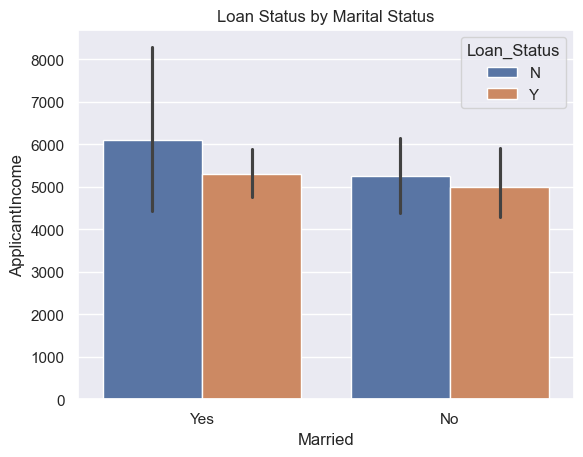

In [161]:
sns.barplot(x='Married', y='ApplicantIncome', hue='Loan_Status', data=loans)
plt.title('Loan Status by Marital Status')
plt.show()


<ul style="list-style-type: none;">
    <li style="font-size: 20px; font-weight: bold;">
        2. What are the most common loan terms(in months) and their effect on approval rates?
    </li>
</ul>

<p>It was discovered that the most common loan terms was 360 months and applicants with this number of loan terms received higher loan approvals as compared to other loan terms</p>

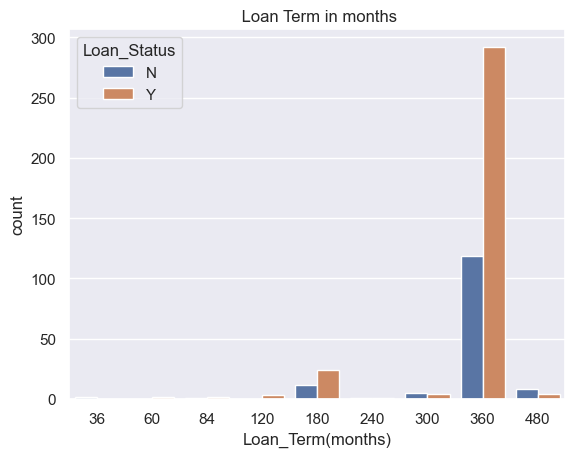

In [162]:
sns.countplot(x='Loan_Term(months)', hue='Loan_Status', data=loans)
plt.title(' Loan Term in months')
plt.show()

<ul style="list-style-type: none;">
    <li style="font-size: 20px; font-weight: bold;">
        3. Does an applicant's income affect the loan amount?
    </li>
</ul>

<p>The results were as follows:</p>
<ol>
    <li>A majority of the loan applicants had an income within the range of 0-25,000</li>
    <li>Loan applicants with a salary higher than 25,000 were few and received just as much as applicants within the lower income range.</li>
    <li>Loan amounts with the range of 400-600(thousand) were few as compared to 0-400(thousand)</li>
    <li>Therefore, applicant income does not affect the amount of the loans approved because an applicant with an income of 50,000+ is getting the same loan amount with an applicant with a lower salary</li>
</ol>

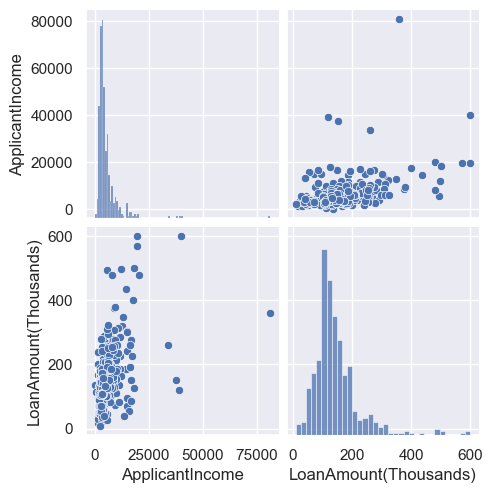

In [163]:
sns.pairplot(loans[['ApplicantIncome', 'LoanAmount(Thousands)']])

<ul style="list-style-type: none;">
    <li style="font-size: 20px; font-weight: bold;">
        4. Do applicants from urban areas have higher loan approval rates compared to those from rural or semi-urban areas?
    </li>
</ul>

<p>No, applicants from urban areas have a lower loan approval rate as compared to applicants from rural and semi-urban property areas</p>

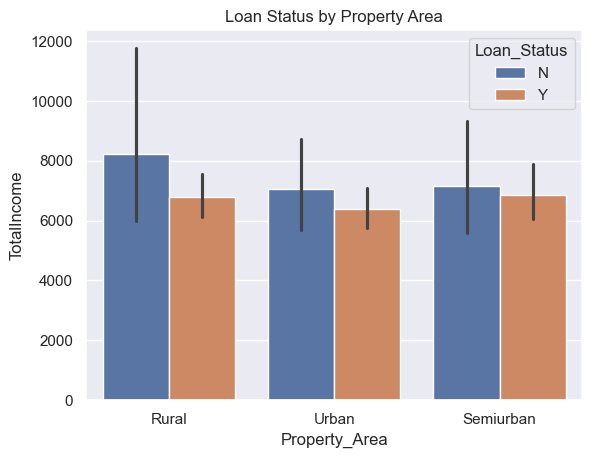

In [164]:
#has been used because this involves a categorical variable
sns.barplot(x='Property_Area', y='TotalIncome', hue='Loan_Status', data=loans)
plt.title('Loan Status by Property Area')
plt.show()

<ul style="list-style-type: none;">
    <li style="font-size: 20px; font-weight: bold;">
        5. What is the effect of the number of dependents on loan approval?
    </li>
</ul>

<p>Applicants with 0 dependents have more positive loan statuses while applicants with 3 or more have the lowest</p>

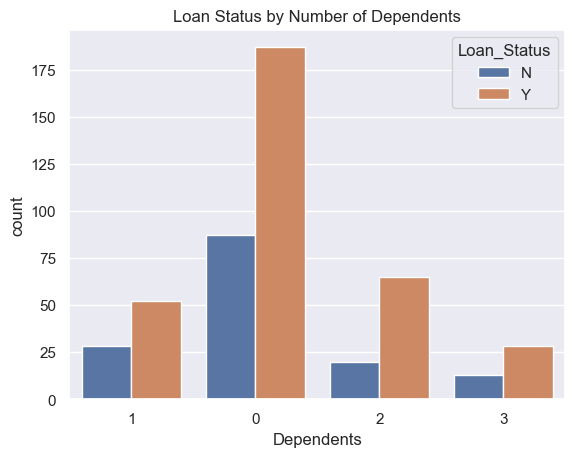

In [165]:
sns.countplot(x='Dependents', hue='Loan_Status', data=loans)
plt.title('Loan Status by Number of Dependents')
plt.show()

<ul style="list-style-type: none;">
    <li style="font-size: 20px; font-weight: bold;">
        6. What is the distribution of applicant incomes across different property areas?
    </li>
</ul>

<p>Applicants in the urban area have the lowest applicant income margin, rural has the highest at 80,000+ while in the semi-urban areas there are applicants within the 30,000-40,000 income range</p>

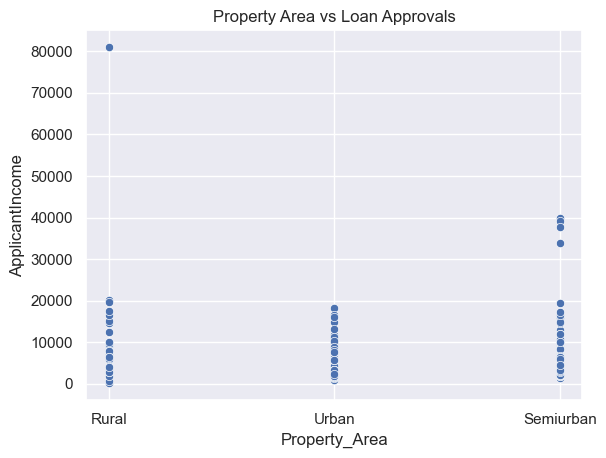

In [166]:
sns.scatterplot(x='Property_Area', y='ApplicantIncome', data=loans)
plt.title('Property Area vs Loan Approvals')
plt.show()


<ul style="list-style-type: none;">
    <li style="font-size: 20px; font-weight: bold;">
        7. How does the applicant's education level affect loan approval rates?
    </li>
</ul>

<p>Applicants who have graduated have more positive loans statuses as compared to non-graduates. The results show that education has a great influence on an applicants loan approval status</p>

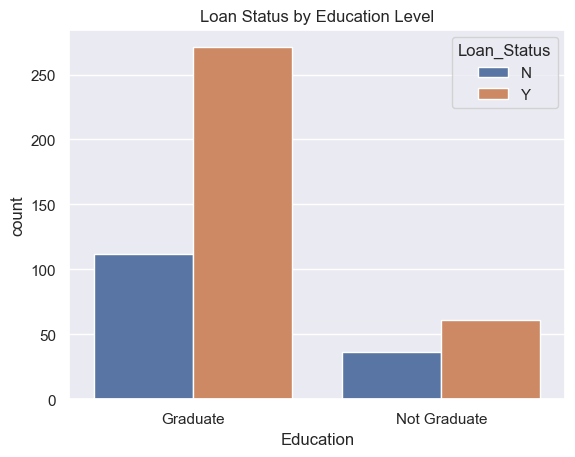

In [167]:
sns.countplot(x='Education', hue='Loan_Status', data=loans)
plt.title('Loan Status by Education Level')
plt.show()

<ul style="list-style-type: none;">
    <li style="font-size: 20px; font-weight: bold;">
        8. How does the applicant's self-employment status affect loan approval chances?
    </li>
</ul>

<p>The self-employed have lower loan approvals as compared to those who are not self-employed. This groups may(may not)consist of the employed therefore the bank or financial institution has considered the financial stability of the applicant and in this case the self-employed applicants do not appear to be financially stable to receive a loan</p>

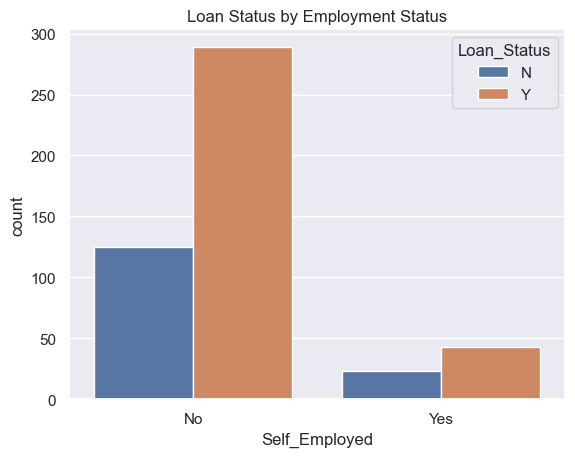

In [168]:
sns.countplot(x='Self_Employed', hue='Loan_Status', data=loans)
plt.title('Loan Status by Employment Status')
plt.show()

<ul style="list-style-type: none;">
    <li style="font-size: 20px; font-weight: bold;">
        9. Are there differences in loan approval rates based on gender?
    </li>
</ul>

<p>From the results of the analysis, male applicants have received more positive responses to their loan statuses as compared to female applicants </p>

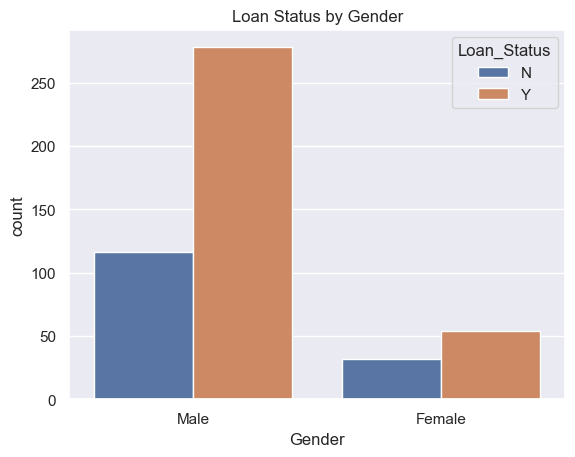

In [169]:
sns.countplot(x='Gender', hue='Loan_Status', data=loans)
plt.title('Loan Status by Gender')
plt.show()

<ul style="list-style-type: none;">
    <li style="font-size: 20px; font-weight: bold;">
        10. How does the presence of a co-applicant affect the likelihood of loan approval?
    </li>
</ul>

<p>The presence of a co-applicant results in positive outcome in the loan approvals. Additionally, it has been noted that the higher the co-applicants' income the higher the chances of receiving a "yes" on one's loan status.</p>

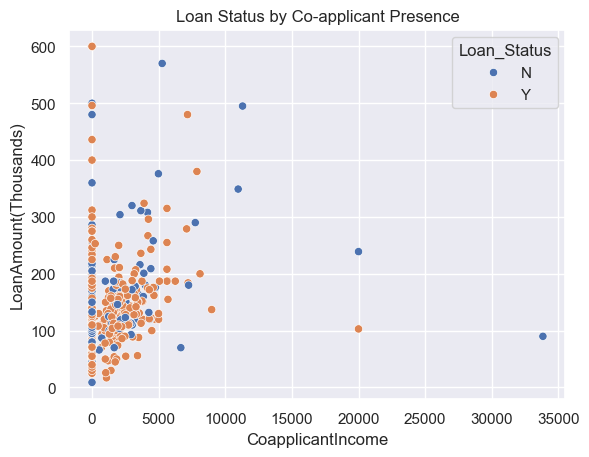

In [176]:
sns.scatterplot(x='CoapplicantIncome', y='LoanAmount(Thousands)', hue='Loan_Status', data=loans)
plt.title('Loan Status by Co-applicant Presence')
plt.show()

<ul style="list-style-type: none;">
    <li style="font-size: 20px; font-weight: bold;">
        11. Is there a correlation between the combined income of the applicant and co-applicant(Total income) and the loan amount?
    </li>
</ul>

<p>
    <li>The correlation between total income and the loan amount is 0.5539140061526622. This means that it is a positive correlation because it is between 0 and 1 </li>
    <li>There is a moderate positive relationship between total income and loan amount. This means that generally, as the total income increases, the loan amount also tends to increase.</li>
<li>The upward trend in the scatter plot visually confirms this positive relationship.</li>
</p>

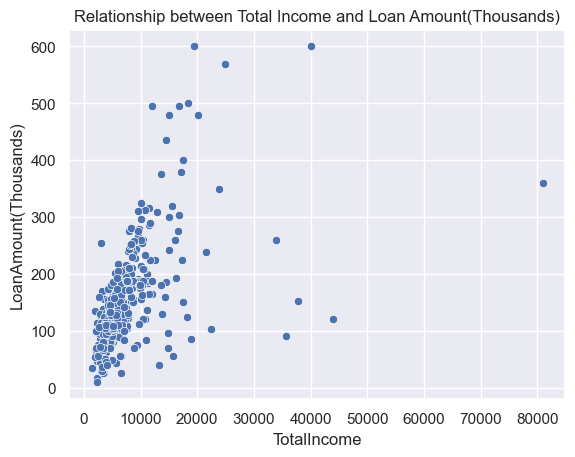

In [177]:
sns.scatterplot(data=loans, x='TotalIncome', y='LoanAmount(Thousands)')
plt.title('Relationship between Total Income and Loan Amount(Thousands)')
plt.show()

In [178]:
#calculating the correlation between the columns
correlation = loans['TotalIncome'].corr(loans['LoanAmount(Thousands)'])
correlation

np.float64(0.5539140061526622)

<ul style="list-style-type: none;">
    <li style="font-size: 20px; font-weight: bold;">
        12. What effect does credit history have on loan status?
    </li>
</ul>

<p>For our analysis we took the values within credit history as follows:</p>
<ol>
    <li>1=Good credit history, 0=Bad credit history</li>
    <li>The results show that applicants with a credit history of 1(Good) received higher loan approvals compared to applicants with a credit history of 0(Bad)</li>
</ol>

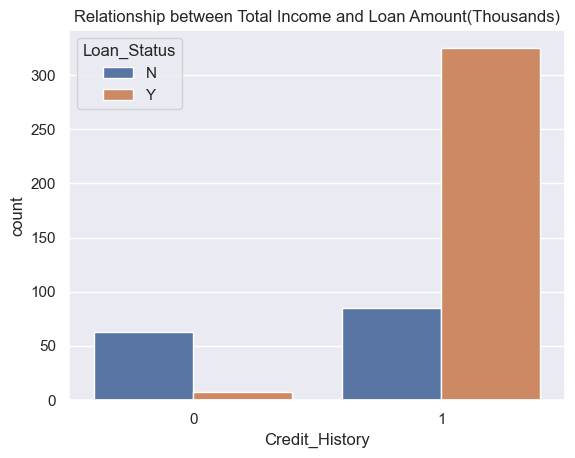

In [179]:
sns.countplot(data=loans, x='Credit_History', hue='Loan_Status')
plt.title('Relationship between Total Income and Loan Amount(Thousands)')
plt.show()